# MIDTERM

## VERI YUKLEME

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/Ceren/MSc/Digital Image Processing/src")

Bu dersin arasınavında , [ChestX-ray8 dataset](https://arxiv.org/abs/1705.02315) veri seti'nden alınan göğüs röntgeni görüntüleriyle çalışacaksınız.
<img src="https://raw.githubusercontent.com/hardik0/AI-for-Medicine-Specialization/master/AI-for-Medical-Diagnosis/Week-1/xray-image.png" alt="U-net Image" width="300" align="middle"/>



In [3]:
# Import necessary packages

# bu çalışmada ihtiyaç duyulacak olan kütüphaneler yüklendi.
# bu kütüphanelerin her biri kendisi için spesifik bir amaç doğrultusunda kullanılmıştır.

# pandas kütüphanesi, veriseti içerisinde kullanılmış olan görseller hakkında detaylı bilgiler içeren CSV dosyasını okumak ve etkili kullanmak amacıyla yüklenmiştir.
# numpy kütüphanesi çok boyutlu dizileri ve matrisleri kullanmak için, bu diziler üzerinde çalışacak üst düzey matematiksel işlevler yapmak için kullanılacaktır.
# png dosyalarının gösterilmesi ve veri hakkındaki istatistiklerin incelenmesi amacıyla matplotlib ve seaborn kütüphaneleri kullanılmıştır
# os kütüphanesi sayesinde verilerin bulunduğu klasör ve dosyalar üzerinde çalışmalar yapılmıştır.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
sns.set()

In [4]:
# Bu iki komutun bir arada kullanılmasıyla, GitHub üzerindeki ChestX-ray8 dataset veri setine erişilerek yüklenmiştir.

!git clone https://github.com/hardik0/AI-for-Medicine-Specialization


Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 14.87 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.


In [5]:
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/

/content/drive/MyDrive/Ceren/MSc/Digital Image Processing/src/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


In [6]:
%ls nih/

densenet.hdf5  images_small/  pretrained_model.h5  test.csv  train-small.csv  valid-small.csv


In [7]:
# Read csv file containing training datadata
train_df = pd.read_csv("nih/train-small.csv")
# Print first 5 rows
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()


# bu aşamada görüntüleri açıklayan ve her bir png dosyası için de tanımlayıcı bilgiler içeren csv dosyası yüklenmiştir.
# yüklenen csv dosyası Görüntü Atelektazi Kardiyomegali Konsolidasyon Ödem Efüzyon Amfizem Fibroz Fıtık İnfiltrasyon Kitle Nodül Hasta Plevral Kalınlaşma Zatürre Pnömotoraks bilgilerini içermektedir.
# bu sütunlar 1 veya 0 ile doldurulmaktadır. Eğer söz konusu parametre hastada mevcutsa 1 değilse 0 olarak doldurulmuştur.

There are 1000 rows and 16 columns in this data frame


Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00008270_015.png            0             0              0      0   
1  00029855_001.png            1             0              0      0   
2  00001297_000.png            0             0              0      0   
3  00012359_002.png            0             0              0      0   
4  00017951_001.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0         0          0         0       0             0     0       0   
1         1          0         0       0             1     0       0   
2         0          0         0       0             0     0       0   
3         0          0         0       0             0     0       0   
4         0          0         0       0             1     0       0   

   PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0       8270                   0          0             0  
1      29855                   0          0             0  
2       1297                   1          0             0  
3      12359                   0          0             0  
4      17951                   0          0             0

Have a look at the various columns in this csv file. The file contains the names of chest x-ray images ("Image" column) and the columns filled with ones and zeros identify which diagnoses were given based on each x-ray image.

### Data types and null values check
Run the next cell to explore the data types present in each column and whether any null values exist in the data.

In [8]:
# Look at the data type of each column and whether null values are present

# veri setinin boyutları
# veri tipleri
# eksik değerler
# bellek kullanımı
# veri hakkında genel bilgi elde etmek amacıyla kullanılmıştır.



train_df.info()


# Elde edilen DataFrame'de 0'dan 999'a kadar dizine eklenmiş 1000 giriş (satır) vardır.
# Veri Sütunları: DataFrame'de 16 sütun (özellik) vardır.
# Boş Olmayan Sayım: Bu durumda, tüm sütunlarda 1000 boş olmayan değer vardır, yani eksik giriş yoktur.
# Dtype: Her sütunun veri türü. Burada, 15 sütun int64 (tamsayılar) türündedir ve 1 sütun (object) nesne türündedir. sütun adı Image
# Bellek Kullanımı: DataFrame tarafından kullanılan toplam bellek yaklaşık 125,1 KB'dir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

### Unique IDs check
"PatientId" has an identification number for each patient. One thing you'd like to know about a medical dataset like this is if you're looking at repeated data for certain patients or whether each image represents a different person.

In [9]:
# train_df DataFrame'indeki toplam hasta kimliği sayısını sayar.
# Aynı DataFrame'deki benzersiz hasta kimliği sayısını sayar.
# Her iki sayımı da görüntüleyen biçimlendirilmiş bir dize yazdırır.

print(f"The total patient ids are {train_df['PatientId'].count()}, from those the unique ids are {train_df['PatientId'].value_counts().shape[0]} ")

# bu kod çalıştıktan sonra 1000 satır veri içerisinde 928 adet hastanın verisinin olduğu gözlemlenmiştir. bu demek olur ki bazı hastalara ait birden fazla kayıt bulunmaktadır.
# bir hastanın birden fazla kez hastane ziyaretinin olması beklenen bir durumdur. ek olarak ilk hastane ziyaretinde sağlıklı olan birisi ikinci ziyaretinde hasta olabilir.
# her görüntü ayrı olarak CSV dosyasında tutulduğundan ve her görüntüye ait detaylar da csv dosyası içerisinde sağlandığından, bu durum bir sorun oluşturmaz.
# yapılan etiketlemeler bir hastaya ait birden fazla görüntü olması durumunda oluşacak sorunları engellemiştir.

The total patient ids are 1000, from those the unique ids are 928 


As you can see, the number of unique patients in the dataset is less than the total number so there must be some overlap. For patients with multiple records, you'll want to make sure they do not show up in both training and test sets in order to avoid data leakage (covered later in this week's lectures).

### Explore data labels
Run the next two code cells to create a list of the names of each patient condition or disease.

In [10]:
# veri setinde yer alan sütunlar bize yapılan etiketleme işlemleri hakkında bilgi verir.
# bu sütunların hepsi ayrı ayrı etiket değildir. sütunlar arasında tanımlayıcı bilgiler de yer almaktadır.

columns = train_df.keys()
columns = list(columns)
print(columns)

['Image', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'PatientId', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [11]:
# veri setindeki sütunlar arasından kimlik tanımlayıcı bilgiler atıldığında elde edilen sütunlar etiketlenmiş verileri içerir

# Remove unnecesary elements
columns.remove('Image')
columns.remove('PatientId')
# Get the total classes
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 14 columns of labels for these conditions: ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


Run the next cell to print out the number of positive labels (1's) for each condition

In [12]:
# her bir etiket için elimizde ne kadar veri olduğu önemli bir durumdur.
# eğer elimizde bir veri için az veya dengesiz miktarda veri varsa o zaman bu durum ek geliştirme gerektirebileceğinden çalışmanın başlarında kontrol edilmesi gereken bir durumdur.

# Print out the number of positive labels for each class
for column in columns:
    print(f"The class {column} has {train_df[column].sum()} samples")

# elde edilen veri seti dengeli değildir.
# Dengeli bir veri setinde her sınıfta yaklaşık olarak eşit sayıda örnek olurdu.
# Ancak bu durumda önemli bir dengesizlik vardır.
# "İnfiltrasyon" ve "Efüzyon" gibi bazı sınıflar, "Fıtık" ve "Zatürre" gibi sınıflara kıyasla çok daha fazla sayıda örneğe sahiptir.

# Bu dengesizlik, makine öğrenimi modellerinin performansını etkiler,
# çünkü bunlar çoğunluk sınıflarına doğru önyargılı olacaktır.
# Eğitim sırasında aşırı örnekleme, yetersiz örnekleme veya sınıf ağırlıklandırma gibi tekniklerle bu dengesizliği gidermek önemlidir.

The class Atelectasis has 106 samples
The class Cardiomegaly has 20 samples
The class Consolidation has 33 samples
The class Edema has 16 samples
The class Effusion has 128 samples
The class Emphysema has 13 samples
The class Fibrosis has 14 samples
The class Hernia has 2 samples
The class Infiltration has 175 samples
The class Mass has 45 samples
The class Nodule has 54 samples
The class Pleural_Thickening has 21 samples
The class Pneumonia has 10 samples
The class Pneumothorax has 38 samples


Have a look at the counts for the labels in each class above. Does this look like a balanced dataset?

### Data Visualization
Using the image names listed in the csv file, you can retrieve the image associated with each row of data in your dataframe.

Run the cell below to visualize a random selection of images from the dataset.

Display Random Images


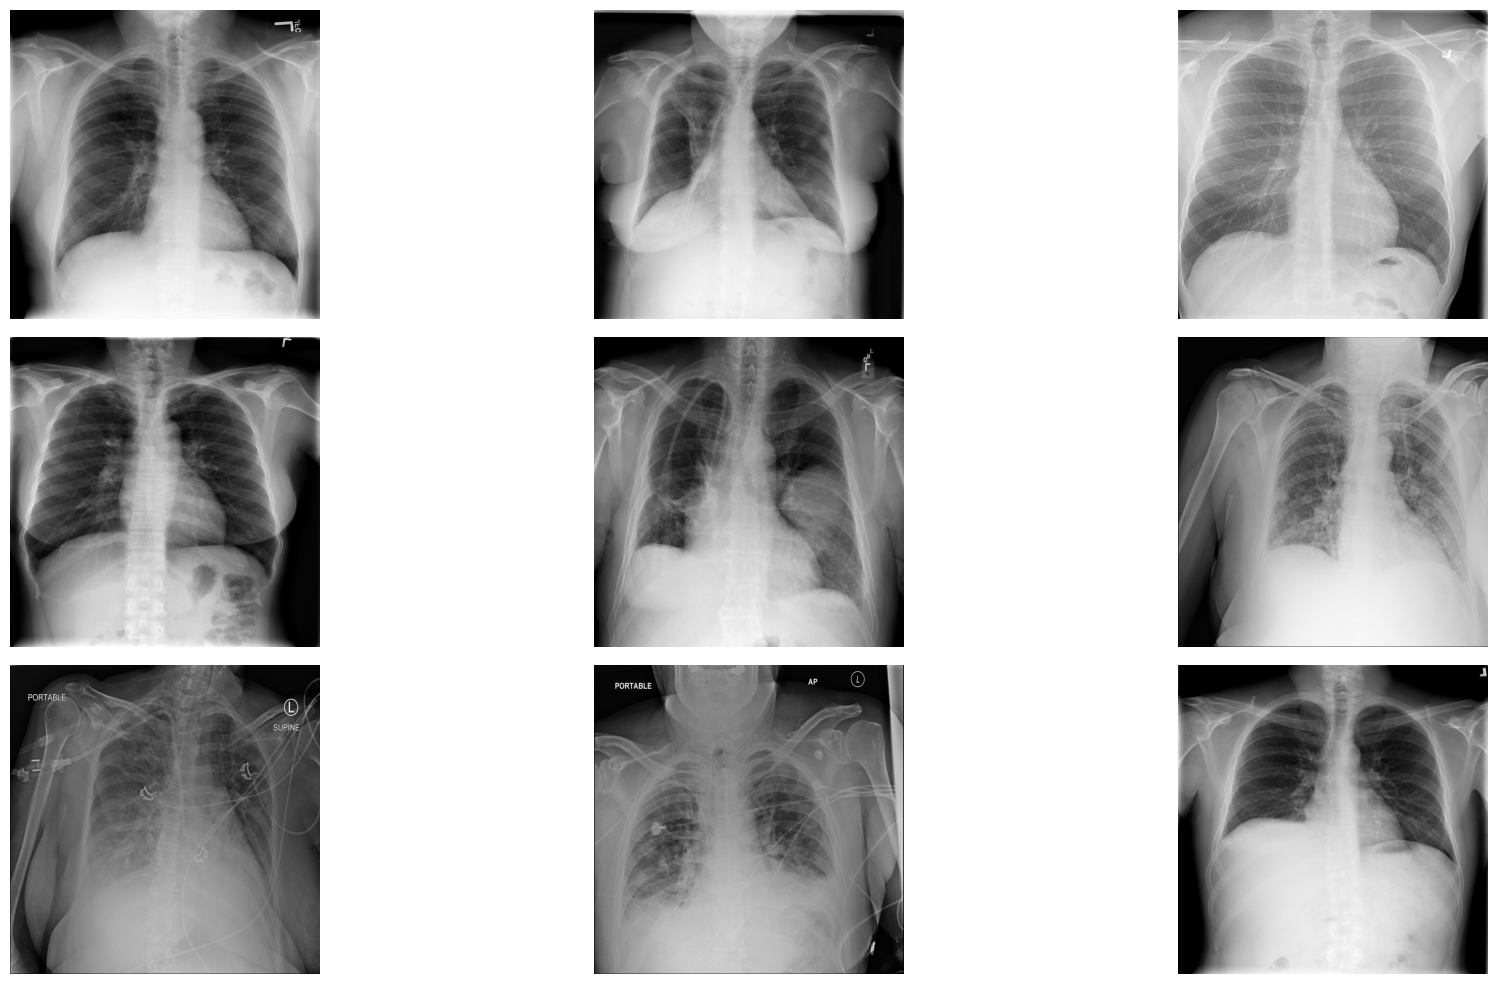

In [13]:
# train_df DataFrame'inden 'Image' sütunu seçilir.
# Bu sütun, muhtemelen tüm görüntülerin dosya yollarını veya benzersiz kimliklerini içerir.
# Seçilen 'Image' sütunundaki değerler, daha sonraki işlemler için kullanılabilecek bir NumPy dizisine dönüştürülür.
# Bu dizi, images adlı bir değişkene atanır.
# Bu kodun temel amacı, görüntülerin dosya yollarını veya kimliklerini içeren bir listeyi elde etmektir.
# Bu liste, daha sonra görüntülerin yüklenmesi, işlenmesi veya bir makine öğrenimi modeline beslenmesi gibi işlemler için kullanılabilecektir.
# Extract numpy values from Image column in data frame
images = train_df['Image'].values

# bu resimlerin içerisinden rasgele 9 örnek listelenmiştir.
# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]


# Bu kod, bir veri setindeki görüntülerin rastgele bir örneğini hızlıca görselleştirmek için kullanılır.
# Bu sayede, veri setinin kalitesi, çeşitliliği ve herhangi bir anomali olup olmadığı hakkında genel bir fikir edinilebilir.
# Location of the image dir
img_dir = 'nih/images_small/'

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Adjust subplot parameters to give specified padding
plt.tight_layout()

** RASTGELE SECİLMİŞ 9 GÖRÜNTÜNÜN ISTATISTIKSEL ÖZELLİKLERİNİ (MAKSIMUM, MINIMUM, MEAN VE STD) HESAPLAYIN. ORNEK OLARAK BIR GORUNTU ICIN HESAPLAMA YAPILMISTIR

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9804 and the minimum is 0.0000
The mean value of the pixels is 0.4796 and the standard deviation is 0.2757


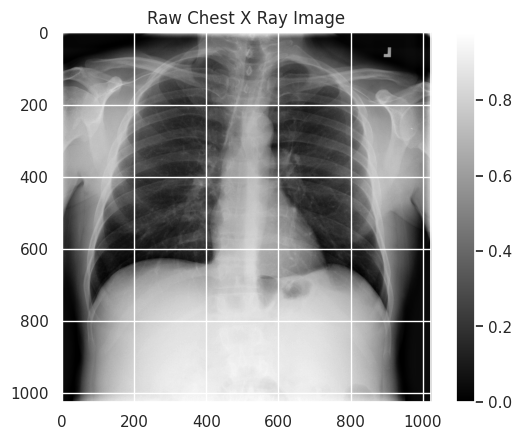

In [14]:
# belirli bir veri çerçevesinden (train_df) alınan ilk görüntüyü yükler, görüntüler ve temel görüntü özelliklerini ekrana yazdırır.
# train_df DataFrame'inden ilk görüntü yolunu alır ve sample_img değişkenine atar.
# img_dir dizinindeki sample_img yolunda bulunan görüntüyü yükler ve raw_image değişkenine atar.
# yüklenen görüntüyü gri tonlamalı olarak ekranda gösterir.
# Görüntünün sağ tarafına bir renk çubuğu ekler, böylece piksel yoğunlukları ile renkler arasındaki ilişkiyi görselleştirir.
# Grafiğin başlığı olarak "Raw Chest X Ray Image" yazar.
# Görüntünün genişlik, yükseklik ve renk kanallarını ekrana yazdırır.
# Görüntüdeki en büyük ve en küçük piksel değerlerini ekrana yazdırır.
# Görüntüdeki piksel değerlerinin ortalamasını ve standart sapmasını ekrana yazdırır.

sample_img = train_df.Image[0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

In [15]:
sample_img

'00008270_015.png'

In [16]:
img_dir = 'nih/images_small/'
random_images = [np.random.choice(images) for i in range(9)]

for i in range(9):
    sample_img = random_images[i]
    print(sample_img)
    raw_image = plt.imread(os.path.join(img_dir, sample_img))

    print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
    print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
    print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")
    print("="*50)

00018494_007.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.4380 and the standard deviation is 0.1837
00025628_016.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.5439 and the standard deviation is 0.2271
00013999_004.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 0.9608 and the minimum is 0.0000
The mean value of the pixels is 0.5115 and the standard deviation is 0.2715
00030393_000.png
The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0431
The mean value of the pixels is 0.4070 and the standard deviation is

RASTGELE SECILMIS 9 GORUNTUNUN HISTOGRAMINI CIZDIRIN. ORNEK OLARAK BIR GORUNTU ICIN VERILMISTIR.

<ipython-input-17-6c41473531df>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

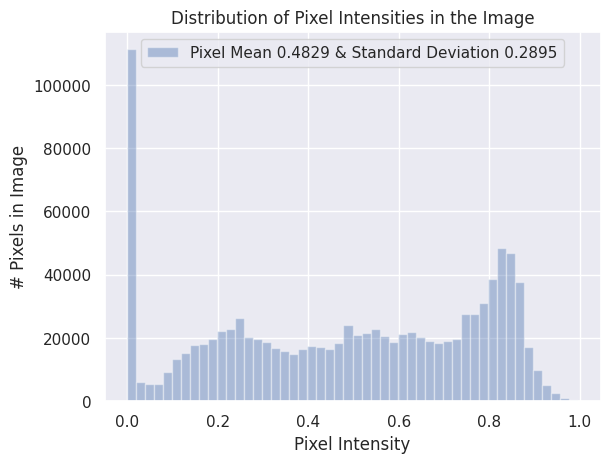

In [17]:
# bir görüntüdeki piksel yoğunluklarının dağılımını görselleştirmek için kullanılır.
# görüntüyü tek boyutlu bir diziye dönüştürür. Yani, görüntüdeki tüm pikseller tek bir sıraya dizilir.
# Seaborn kütüphanesini kullanarak bir histogram oluşturur. Histogram, piksel yoğunluklarının frekans dağılımını gösterir. kde=False parametresi, yoğunluk eğrisinin çizdirilmesini engeller.
# x eksenine "Pixel Intensity" (Piksel Yoğunluğu) etiketi ekler.
# y eksenine "# Pixels in Image" (Görüntüdeki Piksel Sayısı) etiketi ekler.
# Grafiğin başlığı olarak "Distribution of Pixel Intensities in the Image" (Görüntüdeki Piksel Yoğunluklarının Dağılımı) yazar.
# Grafiğin üst merkezine bir efsane ekler. Efsane, histogramın altında yazılan metni içerir. Bu metin, görüntünün ortalama piksel yoğunluğunu ve standart sapmasını gösterir.

sns.distplot(raw_image.ravel(),
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

00017951_001.png


<ipython-input-18-a3d1b9eb8eb1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),


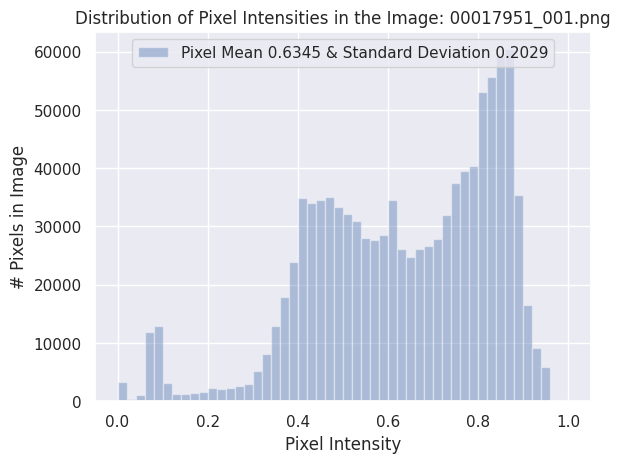

00026322_000.png


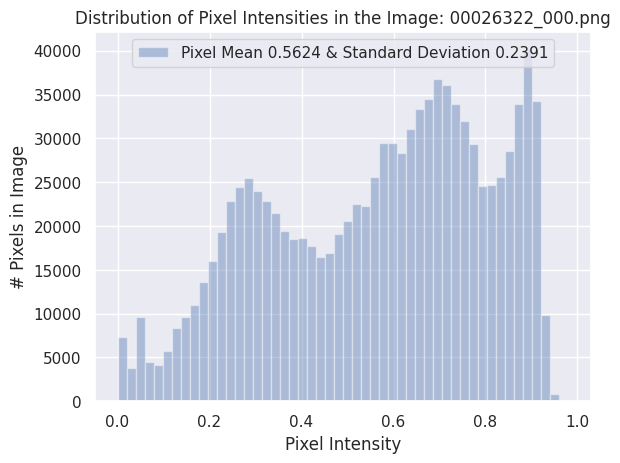

00026825_012.png


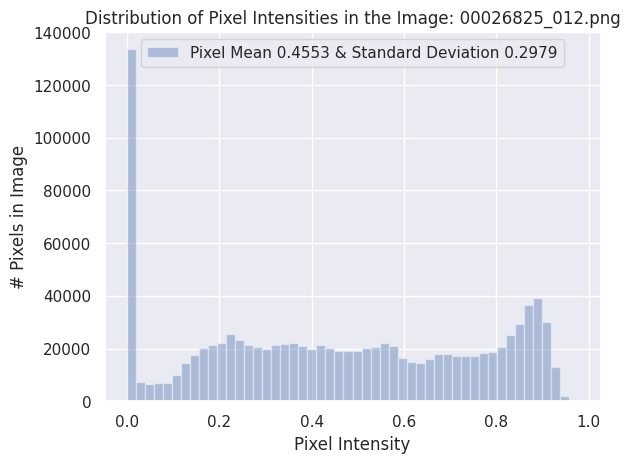

00012359_002.png


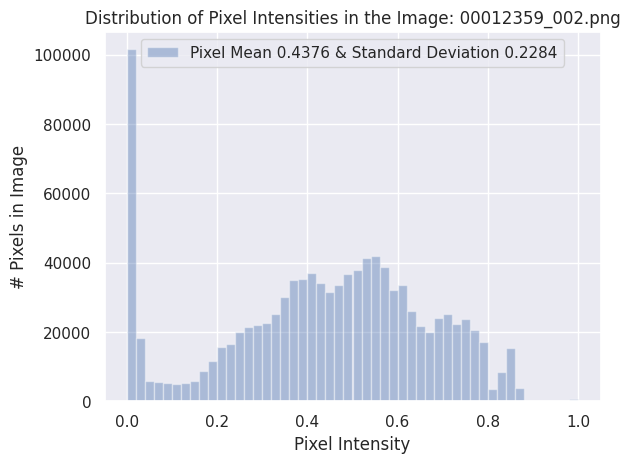

00011315_001.png


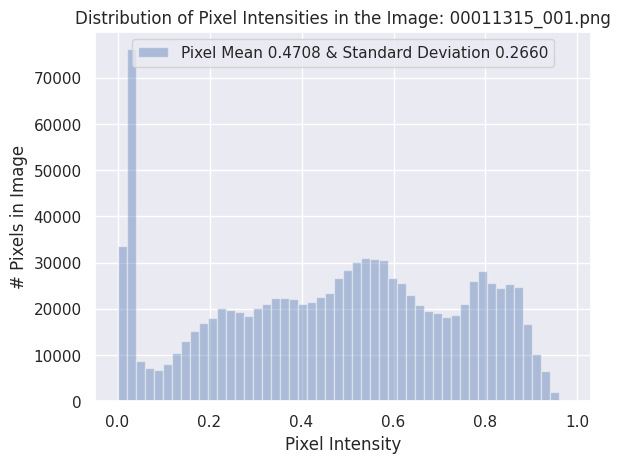

00004581_003.png


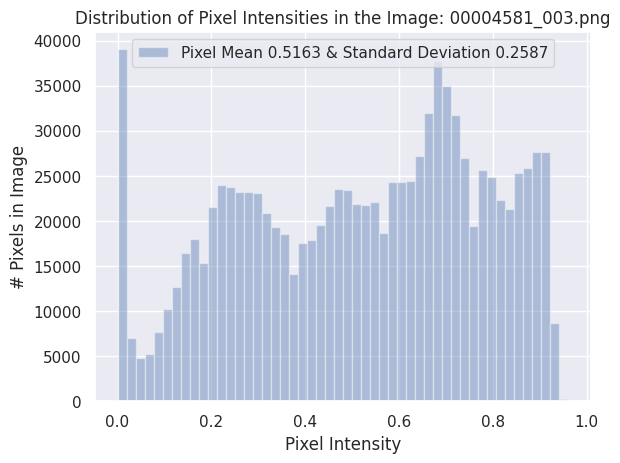

00022526_008.png


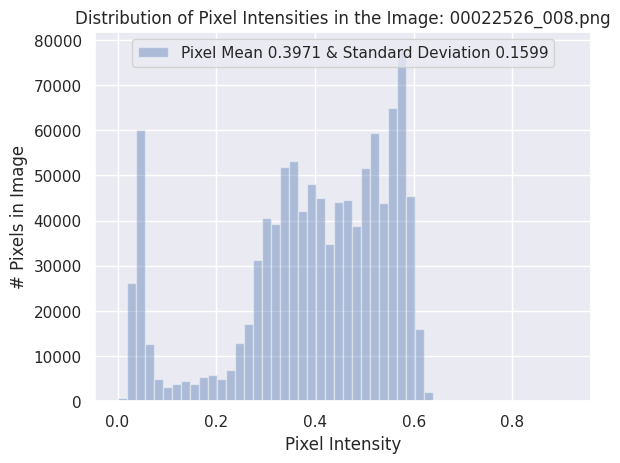

00012585_012.png


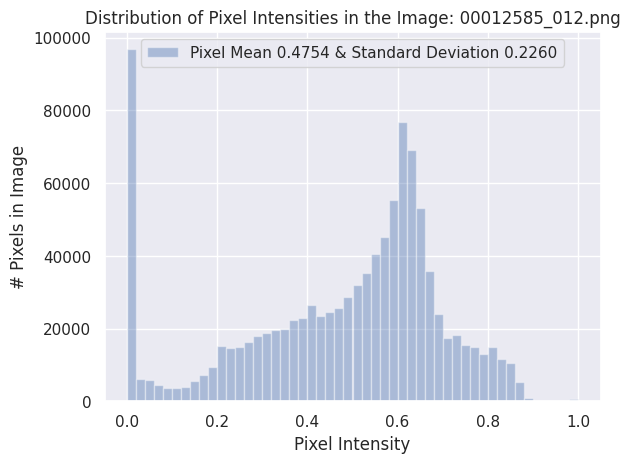

00011049_003.png


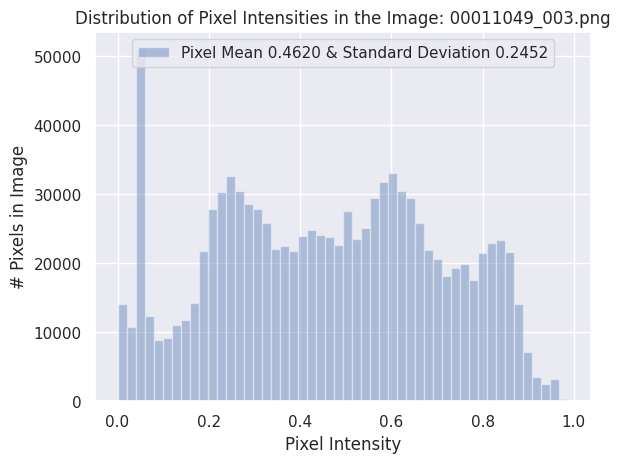

In [18]:
img_dir = 'nih/images_small/'
random_images = [np.random.choice(images) for i in range(9)]

for i in range(9):
    sample_img = random_images[i]
    print(sample_img)
    raw_image = plt.imread(os.path.join(img_dir, sample_img))

    sns.distplot(raw_image.ravel(),
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
    plt.legend(loc='upper center')
    plt.title(f'Distribution of Pixel Intensities in the Image: {sample_img}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('# Pixels in Image')
    plt.show()

GORUNTULERE CONTRAST STRECTCHING YAPINIZ, CONTRAST STRECTCHING GORUNTULERINE GAMMA TRANSFORMATIONU UYGULAYINIZ. ORNEK OLARAK BIR GORUNTU ICIN VERILMISTIR

In [19]:
pip install numpy


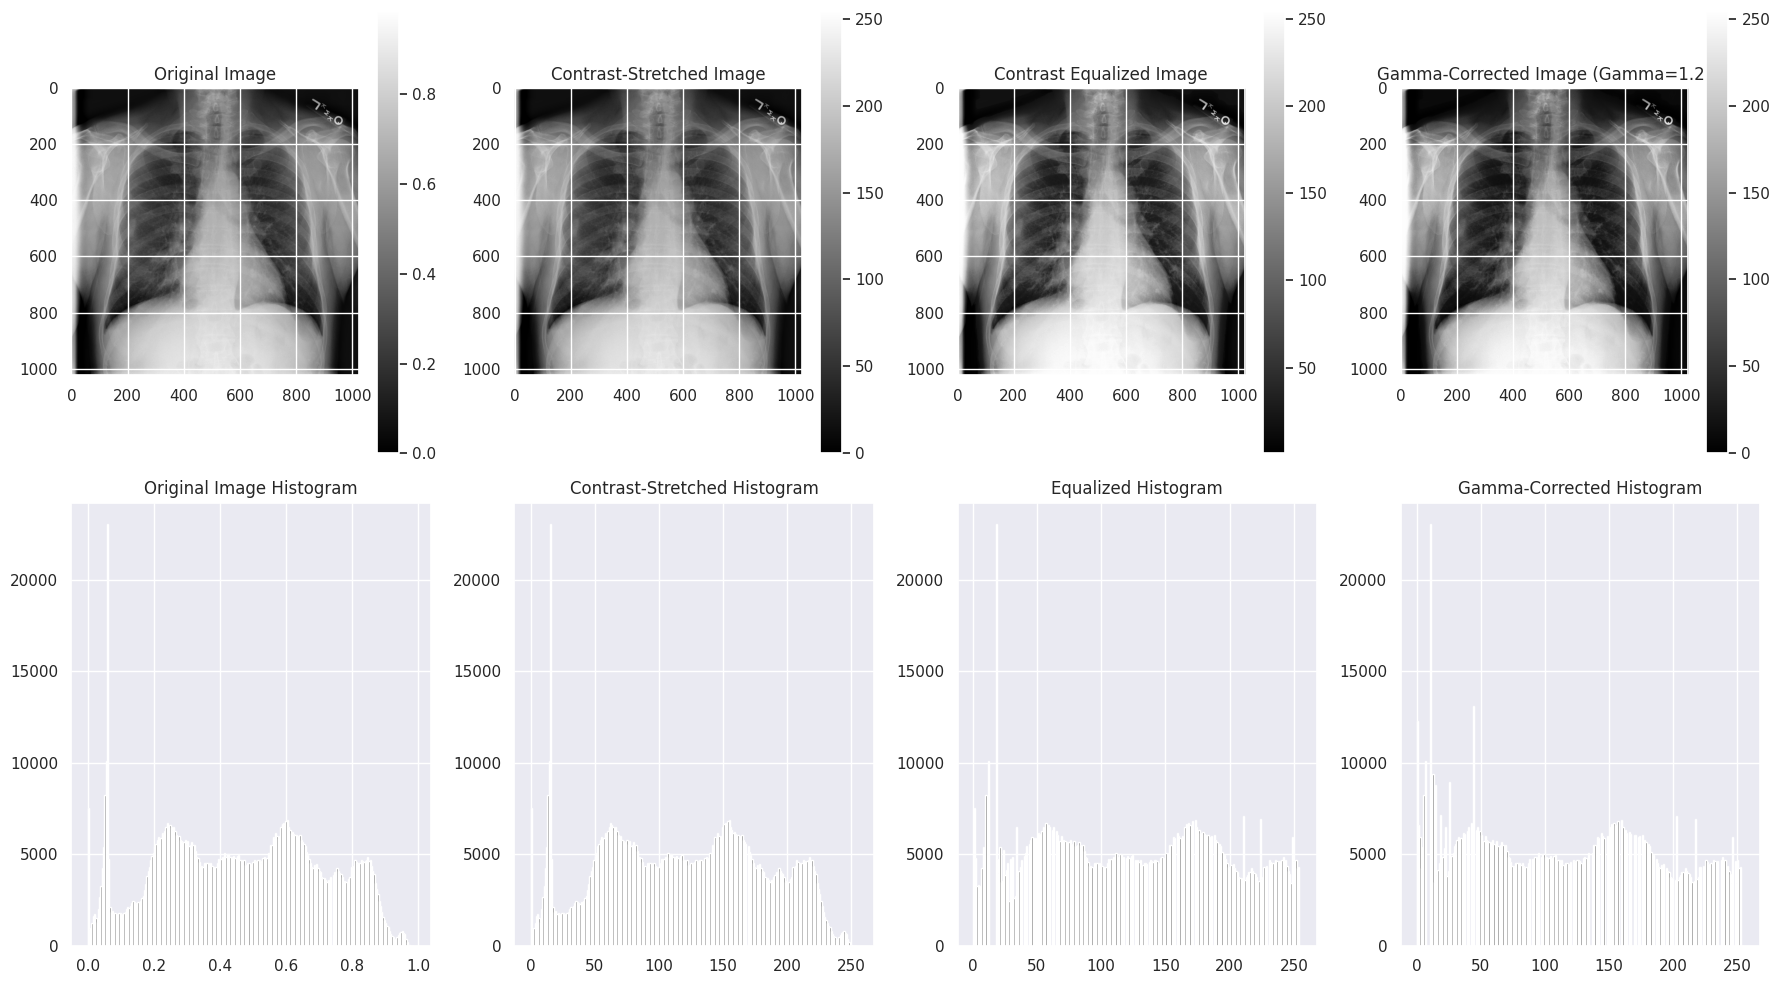

In [20]:
# tıbbi görüntüler üzerinde çeşitli görüntü işleme tekniklerini uygulamaktadır.
# Bu teknikler, görüntülerin kontrastını, yoğunluk dağılımını ve genel görünümünü iyileştirmek için kullanılır.
# Görüntüdeki en küçük ve en büyük piksel değerleri belirlenir.
# Piksel değerleri, 0 ile 1 arasında bir aralığa normalize edilir. Bu, görüntünün dinamik aralığını sıkıştırır.
# Normalize edilmiş piksel değerleri, 0 ile 255 arasında bir aralığa ölçeklenir. Bu, görüntüyü 8-bitlik bir formata dönüştürür.
# skimage.exposure.equalize_hist fonksiyonu kullanılarak, görüntünün histogramı eşitlenir.
# Bu, görüntünün kontrastını artırır ve yoğunluk dağılımını daha düzgün hale getirir.
# Eşitleme işleminden sonra, piksel değerleri 0 ile 255 arasında bir aralığa ölçeklenir.
# gamma değişkeni, gama düzeltme işlemi için bir parametredir.
# Genellikle 1'den büyük değerler, görüntüyü daha parlak hale getirirken, 1'den küçük değerler, görüntüyü daha karanlık hale getirir.
# np.power fonksiyonu kullanılarak, piksel değerleri gama değerine göre güçlendirilir.
# Ardından, sonuç 0 ile 255 arasında bir aralığa ölçeklenir.
# Görüntülerin daha net ve anlaşılır hale getirilmesi için kullanılır.
# Görüntü sınıflandırma veya nesne tespiti gibi görevlerde, daha iyi performans elde etmek için kullanılır.
# Genel görüntü işleme uygulamalarında, görüntülerin kalitesini artırmak için kullanılır.

from skimage import exposure

# Calculate minimum and maximum for contrast stretching
min_val, max_val = raw_image.min(), raw_image.max()

# Step 1: Apply contrast stretching
min_val, max_val = raw_image.min(), raw_image.max()
contrast_stretched = (raw_image - min_val) / (max_val - min_val)  # Normalize to [0, 1]
contrast_stretched = (contrast_stretched * 255).astype(np.uint8)  # Scale to [0, 255] for visualization

# Step 2: Apply histogram equalization after contrast stretching
# Step 2: Apply histogram equalization using skimage
equalized_image = exposure.equalize_hist(contrast_stretched)  # Returns values in [0, 1]
equalized_image = (equalized_image * 255).astype(np.uint8)    # Scale to [0, 255]


# Step 3: Apply gamma correction on the equalized image
gamma = 1.2  # Adjust gamma value as needed
gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
gamma_corrected = gamma_corrected.astype(np.uint8)

# Plot original image and histogram
plt.figure(figsize=(18, 10))
plt.subplot(2, 4, 1)
plt.imshow(raw_image, cmap='gray')
plt.title('Original Image')
plt.colorbar()
plt.subplot(2, 4, 5)
plt.hist(raw_image.ravel(), bins=256, color='gray')
plt.title("Original Image Histogram")

# Plot contrast-stretched image and histogram
plt.subplot(2, 4, 2)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast-Stretched Image')
plt.colorbar()
plt.subplot(2, 4, 6)
plt.hist(contrast_stretched.ravel(), bins=256, color='gray')
plt.title("Contrast-Stretched Histogram")

# Plot contrast-equalized image and histogram
plt.subplot(2, 4, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Contrast Equalized Image')
plt.colorbar()
plt.subplot(2, 4, 7)
plt.hist(equalized_image.ravel(), bins=256, color='gray')
plt.title("Equalized Histogram")

# Plot gamma-corrected image and histogram
plt.subplot(2, 4, 4)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f'Gamma-Corrected Image (Gamma={gamma})')
plt.colorbar()
plt.subplot(2, 4, 8)
plt.hist(gamma_corrected.ravel(), bins=256, color='gray')
plt.title("Gamma-Corrected Histogram")

plt.tight_layout()
plt.show()

In [21]:
from tqdm import tqdm
img_dir = 'nih/images_small/'

gamma_corrected_images = []
for i in tqdm(range(len(images))):
    sample_img = images[i]
    raw_image = plt.imread(os.path.join(img_dir, sample_img))

    min_val, max_val = raw_image.min(), raw_image.max()

    min_val, max_val = raw_image.min(), raw_image.max()
    contrast_stretched = (raw_image - min_val) / (max_val - min_val)  # Normalize to [0, 1]
    contrast_stretched = (contrast_stretched * 255).astype(np.uint8)  # Scale to [0, 255] for visualization

    equalized_image = exposure.equalize_hist(contrast_stretched)  # Returns values in [0, 1]
    equalized_image = (equalized_image * 255).astype(np.uint8)    # Scale to [0, 255]

    gamma = 1.2  # Adjust gamma value as needed
    gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
    gamma_corrected = gamma_corrected.astype(np.uint8)
    gamma_corrected_images.append(gamma_corrected)

100%|██████████| 1000/1000 [02:19<00:00,  7.17it/s]


<ipython-input-21-cb9e466053e8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gamma_corrected.ravel(),


Text(0, 0.5, '# Pixels in Image')

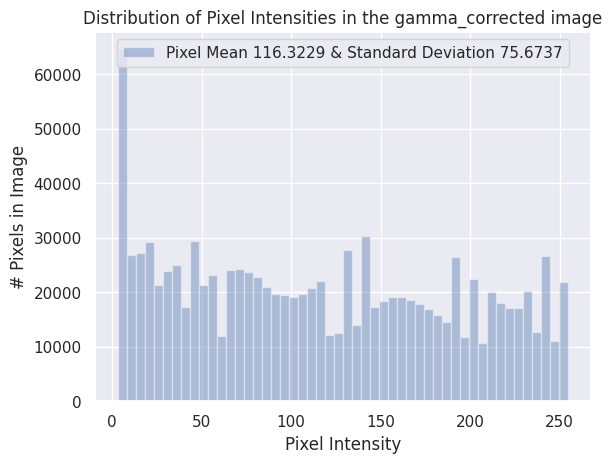

In [ ]:
# Plot a histogram of the distribution of the pixels
sns.distplot(gamma_corrected.ravel(),
             label=f'Pixel Mean {np.mean(gamma_corrected):.4f} & Standard Deviation {np.std(gamma_corrected):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the gamma_corrected image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

TUM GORUNTULERE EMDIAN VE GAUSSIAN BLUR UYGULAYIN

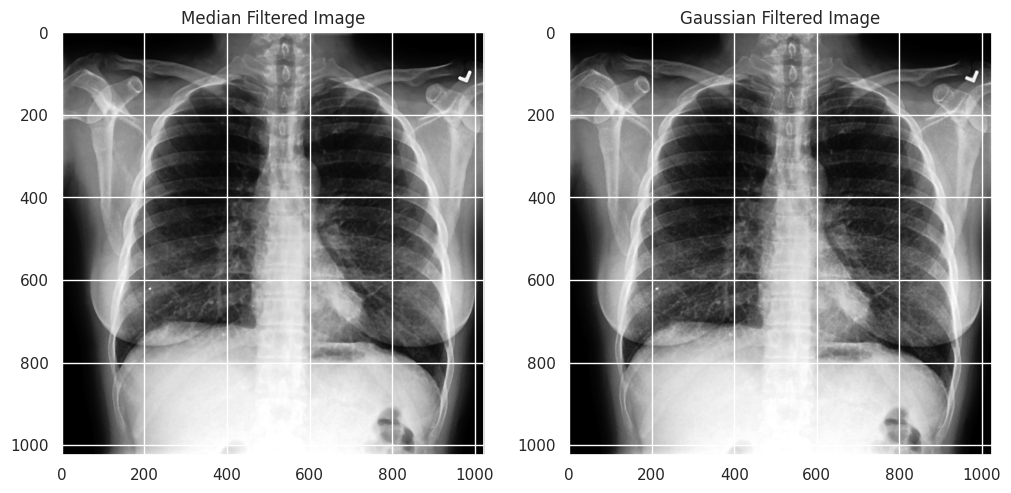

In [ ]:
# OpenCV) kütüphanesini kullanarak, gama düzeltmesi uygulanmış görüntüye gürültü azaltma ve filtreleme teknikleri uygulanmıştır.
# Gürültü Azaltma (Median Filtering)
# Filtreleme (Gaussian Blur)
# işlemleri yapılır.

import cv2  # opencv for python package

# Apply Median Filtering
median_filtered = cv2.medianBlur(gamma_corrected, 5)

# Apply Gaussian Blur
gaussian_filtered = cv2.GaussianBlur(gamma_corrected, (5, 5), 0)

# Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(median_filtered, cmap='gray'), plt.title("Median Filtered Image")
plt.subplot(1, 2, 2), plt.imshow(gaussian_filtered, cmap='gray'), plt.title("Gaussian Filtered Image")
plt.show()


In [ ]:
median_filter_applied_images = []
gaussian_filter_applied_images = []
for g_c_image in tqdm(gamma_corrected_images):

    median_filtered = cv2.medianBlur(g_c_image, 5)
    gaussian_filtered = cv2.GaussianBlur(g_c_image, (5, 5), 0)

    median_filter_applied_images.append(median_filtered)
    gaussian_filter_applied_images.append(gaussian_filtered)

print("Median Filtering Completed", len(median_filter_applied_images))
print("Gaussian Filtering Applied", len(gaussian_filter_applied_images))

100%|██████████| 1000/1000 [00:12<00:00, 80.58it/s]

Median Filtering Completed 1000
Gaussian Filtering Applied 1000


DERECESI RASTGELE 0 ILA 10 ARASINDA OLACAK SEKILDE ROTATION UYGULAYIN GORUNTUYE FLIPPING UYGULAYIN

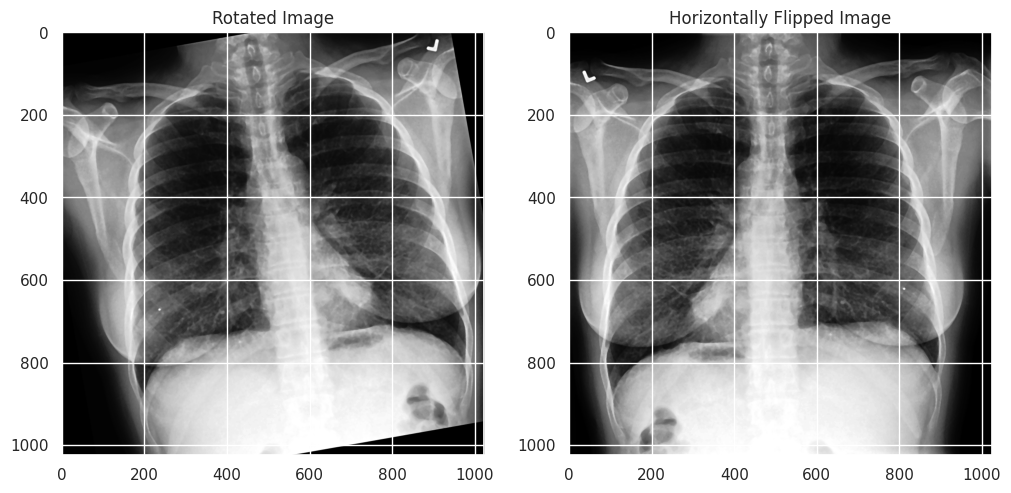

In [ ]:
# bir görüntüyü belirli bir açıyla döndürmek ve yatay olarak ters çevirmek işlemleri uygulanmıştır.
# Görüntünün merkez noktası hesaplanır.
# Döndürme işlemi için gerekli dönüşüm matrisi oluşturulur.
# Döndürme matrisi kullanılarak, median_filtered görüntüsü döndürülür ve yeni bir görüntü olan rotated_image oluşturulur.
# median_filtered görüntüsü yatay olarak ters çevrilir ve flipped_horizontal değişkenine atanır. 1 parametresi, yatay ters çevirmeyi belirtir.

# Example: Rotate the image by 10 degrees

import random

center = (median_filtered.shape[1] // 2, median_filtered.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle=random.randint(0,10), scale=1.0)
rotated_image = cv2.warpAffine(median_filtered, rotation_matrix, (median_filtered.shape[1], median_filtered.shape[0]))

# Horizontal Flip
flipped_horizontal = cv2.flip(median_filtered, 1)

# Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(rotated_image, cmap='gray'), plt.title("Rotated Image")
plt.subplot(1, 2, 2), plt.imshow(flipped_horizontal, cmap='gray'), plt.title("Horizontally Flipped Image")
plt.show()


In [ ]:
import random
rotated_images = []
flipped_images = []

for median_filtered in tqdm(median_filter_applied_images):
    center = (median_filtered.shape[1] // 2, median_filtered.shape[0] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle=random.randint(0, 10), scale=1.0)
    rotated_image = cv2.warpAffine(median_filtered, rotation_matrix, (median_filtered.shape[1], median_filtered.shape[0]))

    flipped_horizontal = cv2.flip(median_filtered, 1)

    rotated_images.append(rotated_image)
    flipped_images.append(flipped_horizontal)
print()
print("Rotation Completed", len(rotated_images))
print("Flipping Completed", len(flipped_images))

100%|██████████| 1000/1000 [00:10<00:00, 92.11it/s]


Rotation Completed 1000
Flipping Completed 1000


In [ ]:
numpy.random.

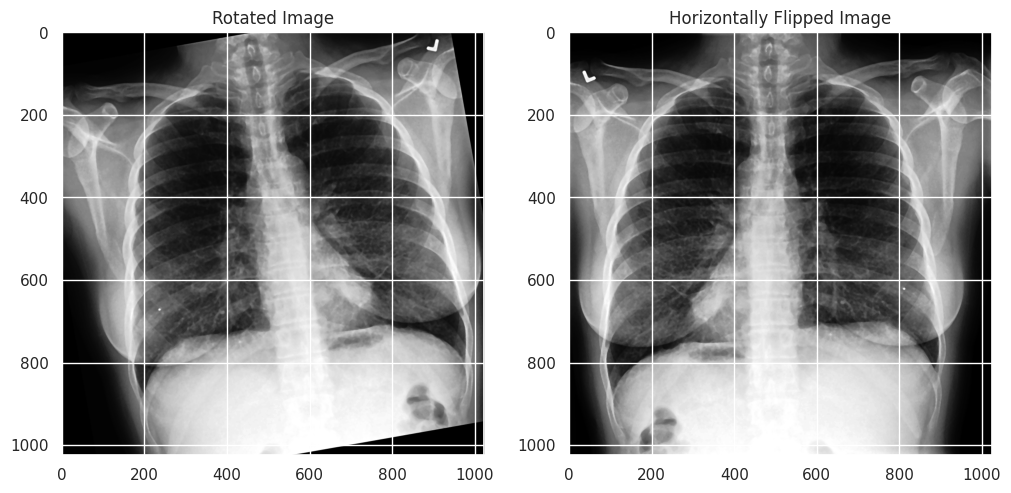

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(rotated_image, cmap='gray'), plt.title("Rotated Image")
plt.subplot(1, 2, 2), plt.imshow(flipped_horizontal, cmap='gray'), plt.title("Horizontally Flipped Image")
plt.show()

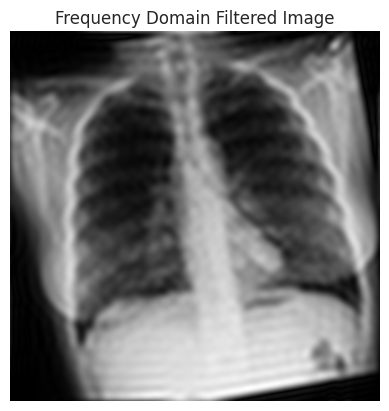

In [ ]:
# bir görüntüyü Fourier dönüşümü kullanarak frekans uzayına dönüştürür,
# belirli bir frekans bandını filtreler ve ardından ters Fourier dönüşümü ile gerçek uzaya geri dönüştürür.
# Bu işlem, görüntü gürültüsünü azaltmak, kenarları vurgulamak veya diğer görüntü işleme görevleri için kullanılmaktadır


# Apply Fourier Transform and shift it to center low frequencies
dft = cv2.dft(np.float32(rotated_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Create a mask for filtering
rows, cols = rotated_image.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # Center low frequencies pass

# Apply mask and inverse DFT
fshift = dft_shifted * mask
f_ishift = np.fft.ifftshift(fshift)
filtered_image = cv2.idft(f_ishift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

# Normalize and display the filtered image
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(filtered_image, cmap='gray')
plt.title("Frequency Domain Filtered Image")
plt.axis("off")
plt.show()

In [ ]:
filtered_images = []
for rotated_image in tqdm(rotated_images):
    dft = cv2.dft(np.float32(rotated_image), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shifted = np.fft.fftshift(dft)

    rows, cols = rotated_image.shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols, 2), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # Center low frequencies pass

    fshift = dft_shifted * mask
    f_ishift = np.fft.ifftshift(fshift)
    filtered_image = cv2.idft(f_ishift)
    filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

    filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
    filtered_images.append(filtered_image)

print("Filtering Completed", len(filtered_images))

100%|██████████| 1000/1000 [00:43<00:00, 23.06it/s]

Filtering Completed 1000


In [ ]:
# bir görüntüyü frekans uzayına dönüştürerek belirli frekans bileşenlerini filtreleyen bir işlem yapar.
# Bu işlem, görüntü gürültüsünü azaltmak,
# kenarları vurgulamak veya görüntüdeki belirli detayları öne çıkarmak için kullanılır
# rotated_image adlı görüntüyü kompleks Fourier dönüşümü uygulayarak frekans uzayına dönüştürür
# frekans spektrumunu kaydırarak düşük frekans bileşenlerini merkeze taşır
# Görüntünün merkezi hesaplanır
# İki kanallı bir maske oluşturulur.
# Maskenin merkezinde bir dairesel bölge oluşturulur.
# Frekans spektrumu ile maske çarpılarak, istenen frekans bandı filtrelenir.
# Filtrelenmiş frekans spektrumu tekrar orijinal konumuna kaydırılır.
# Ters Fourier dönüşümü uygulanarak, frekans uzayından gerçek uzaya geri dönülür
# Gerçek ve sanal kısımların büyüklüğü alınarak, filtrelenmiş görüntü elde edilir.

# Apply Fourier Transform and shift it to center low frequencies
dft = cv2.dft(np.float32(rotated_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

# Create a mask for filtering
rows, cols = rotated_image.shape
crow, ccol = rows // 2 , cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1  # Center low frequencies pass

# Apply mask and inverse DFT
fshift = dft_shifted * mask
f_ishift = np.fft.ifftshift(fshift)
filtered_image = cv2.idft(f_ishift)
filtered_image = cv2.magnitude(filtered_image[:, :, 0], filtered_image[:, :, 1])

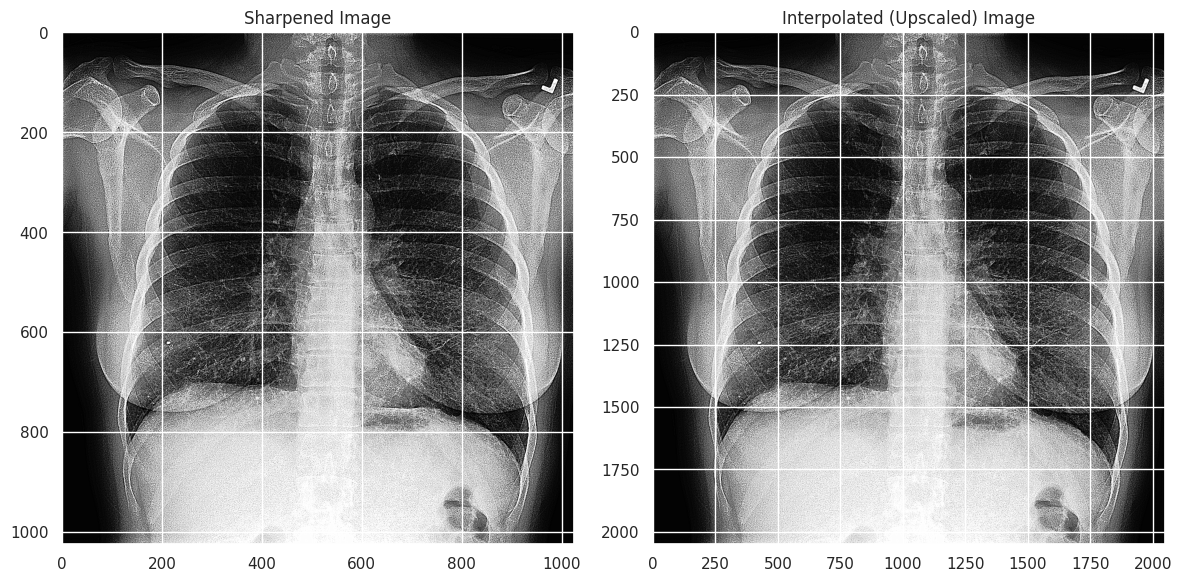

In [ ]:
# bir görüntüyü daha net ve keskin hale getirmek için iki temel görüntü işleme tekniği olan keskinleştirme ve büyütme işlemlerini uygulanmıştır.
# Görüntünün kenarlarını vurgulamak için tasarlanmış bir matris (çekirdek) tanımlanır.
# cv2.filter2D fonksiyonu kullanılarak, keskinleştirme çekirdeği, görüntü üzerinde kaydırılarak her piksel için bir ağırlıklı ortalama hesaplanır.
# np.clip fonksiyonu ile piksel değerleri 0 ile 255 arasında sınırlanır, böylece piksel değerleri geçerli bir aralıkta kalır.
# scale_factor değişkeni ile görüntü kaç kat büyütüleceği belirlenir.
# scipy.ndimage.zoom fonksiyonu kullanılarak, keskinleştirilmiş görüntü, bikübik enterpolasyon yöntemi ile büyütülür.
# matplotlib kütüphanesi kullanılarak, orijinal görüntü, keskinleştirilmiş görüntü ve büyütülmüş görüntü yan yana gösterilir.

from scipy.ndimage import zoom

# Step 4: Apply sharpening using an unsharp masking kernel
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
sharpened_image = np.clip(cv2.filter2D(gamma_corrected, -1, sharpening_kernel), 0, 255).astype(np.uint8)

# Step 5: Apply bicubic interpolation to upscale the image by a factor of 2
scale_factor = 2
resized_image = zoom(sharpened_image, scale_factor, order=3)  # Bicubic interpolation with `order=3`

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(sharpened_image, cmap='gray'),plt.title("Sharpened Image")
plt.subplot(1, 2, 2), plt.imshow(resized_image, cmap='gray'),plt.title("Interpolated (Upscaled) Image")


plt.tight_layout()
plt.show()

In [22]:
from tqdm import tqdm
img_dir = 'nih/images_small/'

gamma_corrected_images = {}
for i in tqdm(range(len(images))):
    sample_img = images[i]
    raw_image = plt.imread(os.path.join(img_dir, sample_img))

    min_val, max_val = raw_image.min(), raw_image.max()

    min_val, max_val = raw_image.min(), raw_image.max()
    contrast_stretched = (raw_image - min_val) / (max_val - min_val)  # Normalize to [0, 1]
    contrast_stretched = (contrast_stretched * 255).astype(np.uint8)  # Scale to [0, 255] for visualization

    equalized_image = exposure.equalize_hist(contrast_stretched)  # Returns values in [0, 1]
    equalized_image = (equalized_image * 255).astype(np.uint8)    # Scale to [0, 255]

    gamma = 1.2  # Adjust gamma value as needed
    gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
    gamma_corrected = gamma_corrected.astype(np.uint8)
    gamma_corrected_images[sample_img] = gamma_corrected

100%|██████████| 1000/1000 [01:59<00:00,  8.36it/s]


In [23]:
os.getcwd()

'/content/drive/MyDrive/Ceren/MSc/Digital Image Processing/src/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis'

In [ ]:
#plt.savefig(f'/content/drive/MyDrive/Ceren/MSc/Digital Image Processing/data/processed/{gamma_corrected_imName}'): İşlenmiş görüntü belirtilen dizine kaydedilir.


import cv2
from scipy.ndimage import zoom
sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])


for gamma_corrected_imName in tqdm(gamma_corrected_images.keys()):
    sharpened_image = np.clip(cv2.filter2D(gamma_corrected_images[gamma_corrected_imName], -1, sharpening_kernel), 0, 255).astype(np.uint8)


    scale_factor = 2
    resized_image = zoom(sharpened_image, scale_factor, order=3)  # Bicubic interpolation with `order=3`


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1), plt.imshow(sharpened_image, cmap='gray'),plt.title("Sharpened Image")
    plt.subplot(1, 2, 2), plt.imshow(resized_image, cmap='gray'),plt.title("Interpolated (Upscaled) Image")




    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/Ceren/MSc/Digital Image Processing/data/processed/{gamma_corrected_imName}')


Output hidden; open in https://colab.research.google.com to view.